If you're going to make a copy can you please upvote this notebook (im trying to make progress)

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

import itertools
import seaborn as sns
from sklearn import metrics 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
df_true1 = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
df_fake1 = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")

In [3]:
print(df_true1["text"][0])

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educati

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [5]:
#texts = df_true1["title"].to_list()

fake_articlesdf = pd.read_csv("/kaggle/input/chatgpt-fake-articles/chatgpt_fake_articles (1).csv", encoding='unicode_escape')

fake_articles = fake_articlesdf["text"].to_list()

fake_articlesdf2 = pd.read_csv("/kaggle/input/chatgpt-fake-articles/chatgpt_fake_articles.csv", encoding='unicode_escape')

fake_articles2 = fake_articlesdf2["text"].to_list()



true_titles = df_true1["text"].to_list()

fake_titles = df_fake1["text"].to_list()

texts = true_titles + fake_titles + fake_articles

#add a new dataset to this one to test (so the tokenizer has seen the words before)
textswithfakearticles = true_titles + fake_titles + fake_articles + fake_articles2

# Create labels
true_labels = [1] * len(true_titles)
fake_labels = [0] * len(fake_titles)
fake_article_labels = [0] * len(fake_articles)

labels = true_labels + fake_labels + fake_article_labels




#print(texts)

#texts = [text]

#print(texts)

tokenizer.fit_on_texts(textswithfakearticles)

tokenized = tokenizer.texts_to_sequences(texts)



print(max(tokenizer.word_index.values()))

vocab_size = max(tokenizer.word_index.values())+1

print(vocab_size)


#print(tokenized)

print(len(tokenized))
print(len(labels))
#print(labels)



138053
138054
44948
44948


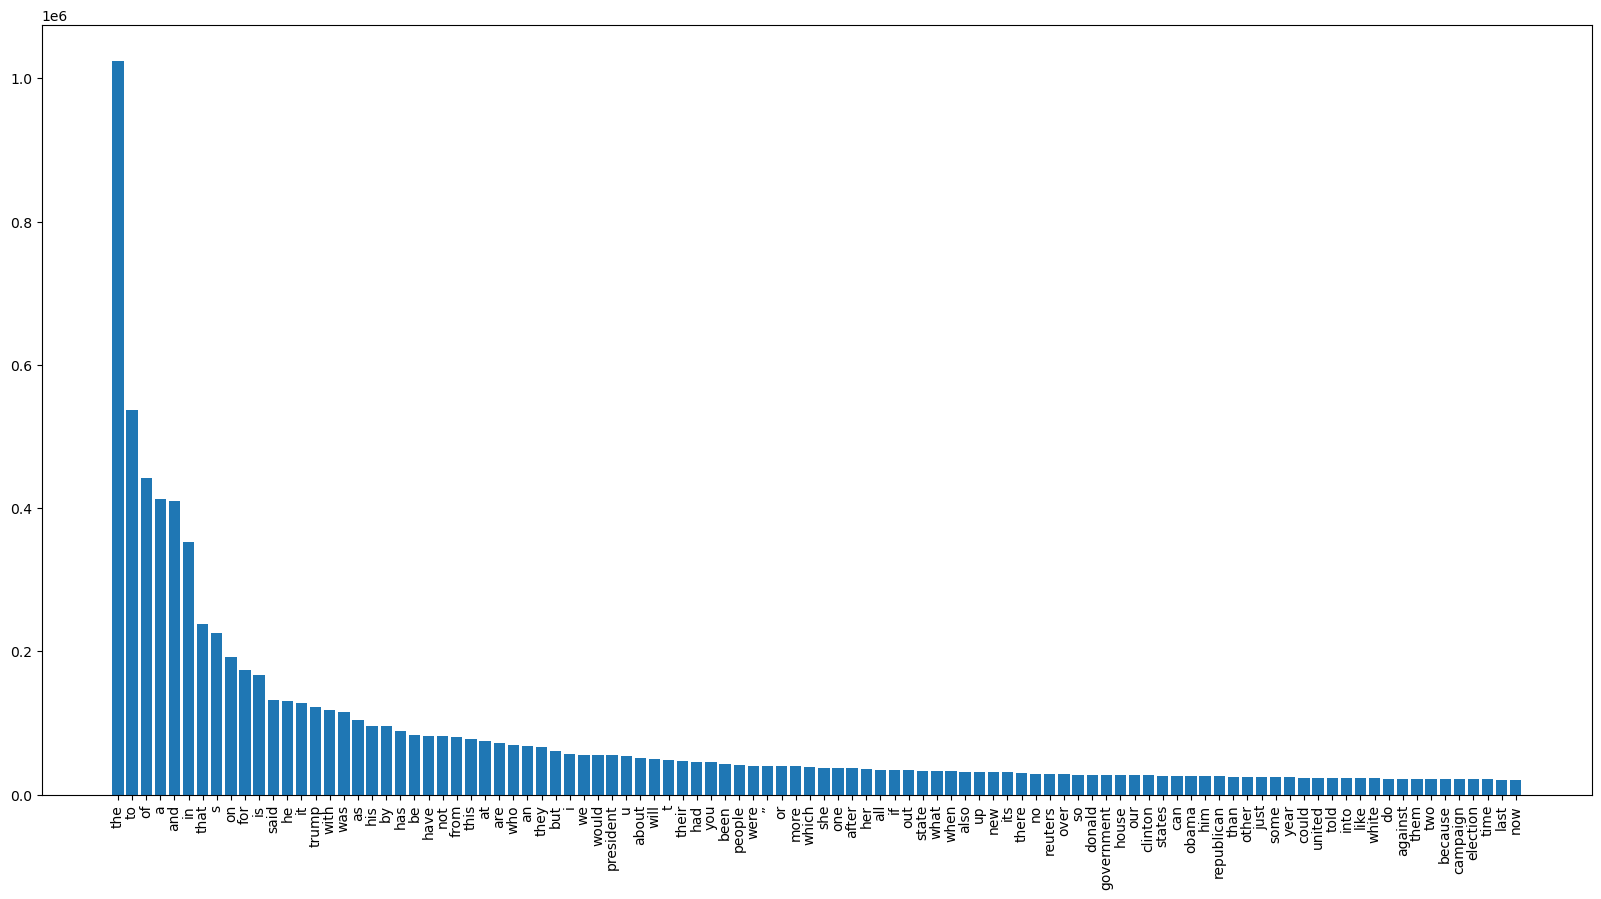

In [6]:
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words = sorted_word_counts[:100]
words, counts = zip(*most_common_words)
plt.figure(figsize=(20,10))
plt.bar(words, counts)
plt.xticks(rotation='vertical')
plt.show()

Distribution of article lengths


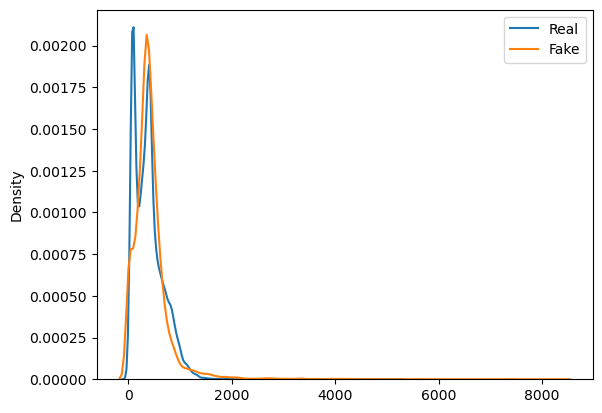

In [7]:
lengths = [len(item) for item in tokenized]

max_length = max(lengths)
min_length = min(lengths)

max_length_index = lengths.index(max_length)
min_length_index = lengths.index(min_length)

true_tokenized = tokenizer.texts_to_sequences(true_titles)

fake_tokenized = tokenizer.texts_to_sequences(fake_titles)

true_lengths = [len(item) for item in true_tokenized]

fake_lengths = [len(item) for item in fake_tokenized]

print("Distribution of article lengths")

#sns.kdeplot(lengths, label='Overall')
sns.kdeplot(true_lengths, label='Real')
sns.kdeplot(fake_lengths, label='Fake')

plt.legend()
plt.show()

It's quite surprising that Fake articles don't have that spike around low lengths that Real ones do.

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


padded_sequences = pad_sequences(tokenized, padding='post')

print(padded_sequences)

lengths = [len(item) for item in padded_sequences]

max_length = max(lengths)
min_length = min(lengths)

max_length_index = lengths.index(max_length)
min_length_index = lengths.index(min_length)

#print(f"Longest element is '{texts[max_length_index]}' with length {max_length} at index {max_length_index}")
#print(f"Shortest element is '{texts[min_length_index]}' with length {min_length} at index {min_length_index}")


[[ 107   67    1 ...    0    0    0]
 [ 107   67 1549 ...    0    0    0]
 [ 107   67    1 ...    0    0    0]
 ...
 [   1   15  155 ...    0    0    0]
 [   1  163   21 ...    0    0    0]
 [   1   15  155 ...    0    0    0]]


1/1 [==============================] - 3s 3s/step
(32, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8375, 44)          6074376   
                                                                 
 bidirectional (Bidirectiona  (None, 512)              616448    
 l)                                                              
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 6,822,666
Trainable params: 6,822,666
Non-trainable params: 0
_________________________________________________________________


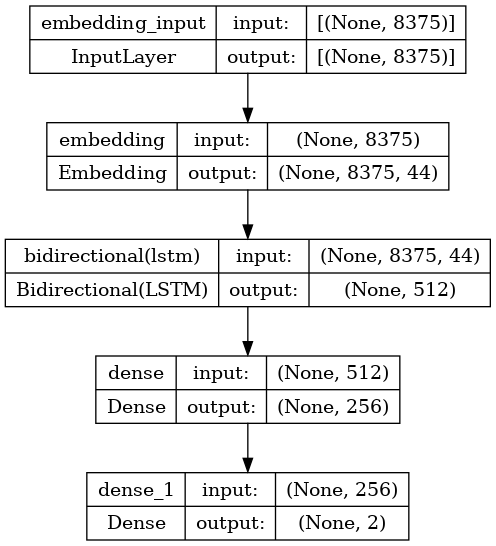

In [9]:
embedding_length = 44
#embedding_length = 10
#embedding_length = 1

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * (10**(-epoch/2))
callbacks = [LearningRateScheduler(scheduler, verbose=1)]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_length, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences = False)))
#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)))
#model.add(tf.keras.layers.Dropout(0.15)) #speculative
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation = "relu"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(2, activation = "softmax"))
input_array = np.random.randint(1000, size=(32, max_length))
model.compile(tf.keras.optimizers.AdamW(weight_decay=0.001), 'binary_focal_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy()])
output_array = model.predict(input_array)
print(output_array.shape)
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



In [10]:
print(padded_sequences[20])

[107  67   4 ...   0   0   0]


In [11]:
labels = np.array(labels)

one_hot_labels = to_categorical(labels)

print(one_hot_labels[0])

sequences_train, sequences_test, labels_train, labels_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=43)


#model.fit(sequences_train, labels_train, epochs = 3, batch_size = 256, validation_data=(sequences_test, labels_test), callbacks=callbacks)
model.fit(sequences_train, labels_train, epochs = 4, batch_size = 64, validation_data=(sequences_test, labels_test), callbacks=callbacks)
model.evaluate(sequences_test, labels_test)




[0. 1.]

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/4
562/562 [==============================] - 771s 1s/step - loss: 0.0110 - binary_accuracy: 0.9871 - val_loss: 0.0013 - val_binary_accuracy: 0.9989 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.00031622778103685084.
Epoch 2/4
562/562 [==============================] - 743s 1s/step - loss: 4.0006e-04 - binary_accuracy: 0.9997 - val_loss: 9.1546e-04 - val_binary_accuracy: 0.9989 - lr: 3.1623e-04

Epoch 3: LearningRateScheduler setting learning rate to 3.162277862429619e-05.
Epoch 3/4
562/562 [==============================] - 733s 1s/step - loss: 1.2038e-04 - binary_accuracy: 0.9999 - val_loss: 9.4470e-04 - val_binary_accuracy: 0.9991 - lr: 3.1623e-05

Epoch 4: LearningRateScheduler setting learning rate to 1.0000000409520217e-06.
Epoch 4/4
281/281 [==============================] - 109s 389ms/step - loss: 9.4662e-04 - binary_accuracy: 0.9991


[0.0009466164046898484, 0.9991101026535034]

281/281 [==============================] - 110s 391ms/step - loss: 9.4662e-04 - binary_accuracy: 0.9991
Accuracy: 99.91%
confusion matrix,without normalization


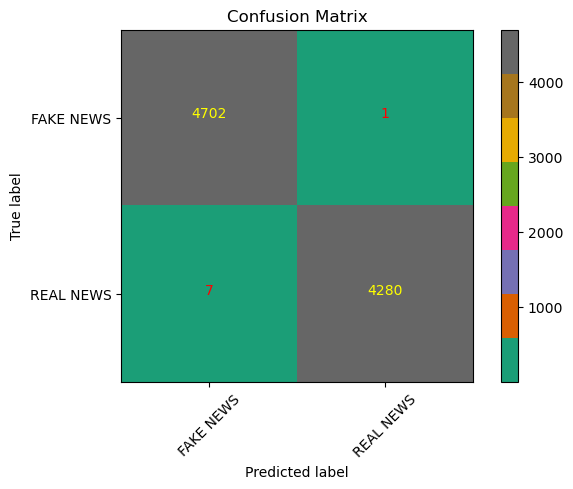

In [12]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Dark2):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalize confusion matrix")
  else:
    print('confusion matrix,without normalization')

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 

pred_lr=model.predict(sequences_test)
score = model.evaluate(sequences_test, labels_test)
pred_lr = (pred_lr > 0.5).astype(int)
labels_test_single = np.argmax(labels_test, axis=1)
pred_lr_single = np.argmax(pred_lr, axis=1)
print(f'Accuracy: {round(score[1]*100,2)}%')
cm = metrics.confusion_matrix(labels_test_single,pred_lr_single)
plot_confusion_matrix(cm, classes=['FAKE NEWS', 'REAL NEWS'])


In [13]:
misclassified_indices = np.where(pred_lr_single != labels_test_single)[0]
#print(misclassified_indices)

incorrect_labels = []
for i in misclassified_indices:
    incorrect_labels.append(pred_lr_single[i])

misclassified_sequences = []
for i in misclassified_indices:
    misclassified_sequences.append(sequences_test[i])
misclassified_texts = tokenizer.sequences_to_texts(misclassified_sequences)

for i in range(len(misclassified_texts)):
    if incorrect_labels[i] == 1:
        print("Predicted Real\n")
    if incorrect_labels[i] == 0:
        print("Predicted Fake\n")
    print(misclassified_texts[i])
    print()

    


Predicted Fake

vatican city reuters if you ever wondered how to say fake news in latin it s nuntii fallaces and pope francis is writing a document on just that francis announced it himself in a tweet to his nearly 40 million followers on friday saying the theme of his message for the roman catholic church s next world day of social communications will be the truth will set you free fake news and journalism for peace in latin one of the nine languages the pope uses to tweet that would be veritas liberavit vos nuntii fallaces et diurniariorum opus ad pacem a vatican statement said the issue was important enough for the pope to address because fake news contributes to generating and nurturing a strong polarisation of opinions a distortion of facts it said can have repercussions at the level of individual and collective behaviour francis said in an interview last year that media that focus on scandals and spread fake news to smear politicians risk becoming like people who have a morbid fa

In [14]:
#you can use this cell to look into different inputs and their corresponding predictions
#the two marked positions below indicate the demarkation between real and fake news
#the label [0, 1] represents real news

position = 21416

position = 21417

input_array=padded_sequences[position]
print(texts[position])
print(input_array)

input_array = np.expand_dims(input_array, 0)
print(input_array)

output_array = model.predict(input_array)
print(output_array)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In [15]:
hard_test = tokenizer.texts_to_sequences(fake_articles2)

padded_fake_articles = pad_sequences(hard_test, padding='post', maxlen=8375)



In [16]:
#this is a test on fake articles generated by chatGPT

#for position in range(len(padded_fake_articles)):
for position in range(2):
    input_array=padded_fake_articles[position]
    print(fake_articles[position])
    #print(input_array)

    input_array = np.expand_dims(input_array, 0)
    #print(input_array)

    output_array = model.predict(input_array)
    print(output_array)

In a deeply resonant address to the nation, former President Barack Obama passionately emphasized the paramount importance of unity and profound reflection on the tumultuous era of the Trump administration. Speaking at a bipartisan gathering in the heart of Washington, D.C., Obama stood before the audience, his voice resolute and laden with conviction, as he implored Americans to transcend the barriers of political divisiveness and unite under the shared values that define the nation.

With eloquence and charisma, Obama delved into the complexities of navigating a deeply divided society. He drew upon historical examples, weaving together narratives of national progress and resilience. The audience listened intently, captivated by his words that resonated with hope, inspiration, and a call to action.

Obama reflected upon his own experiences during his presidency, sharing anecdotes of triumphs and challenges. He discussed the landmark legislation enacted under his administration, highli

1/1 [==============================] - 0s 276ms/step - loss: 1.4649e-04 - binary_accuracy: 1.0000
Accuracy: 100.0%
confusion matrix,without normalization


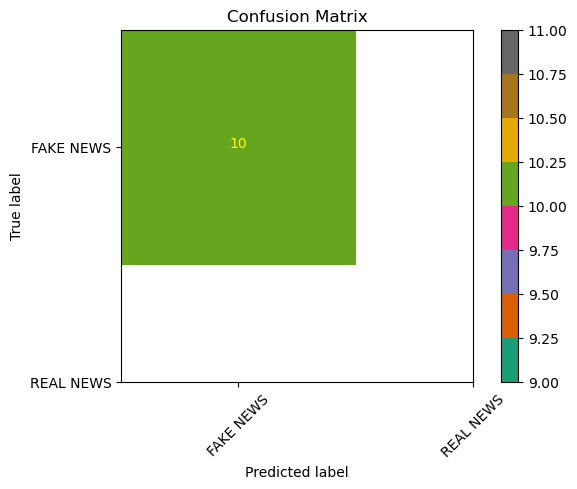

In [17]:
hard_test_labels = [0] * len(padded_fake_articles)

hard_test_labels = [1] + hard_test_labels

hard_test_labels = np.array(hard_test_labels)

one_hot_hard_test_labels = to_categorical(hard_test_labels)

one_hot_hard_test_labels = np.delete(one_hot_hard_test_labels, 0, axis=0)


#print(one_hot_hard_test_labels)

model.evaluate(padded_fake_articles, one_hot_hard_test_labels)



pred_lr2=model.predict(padded_fake_articles)
score2 = model.evaluate(padded_fake_articles, one_hot_hard_test_labels)
pred_lr2 = (pred_lr2 > 0.5).astype(int)
labels_test_single2 = np.argmax(one_hot_hard_test_labels, axis=1)
pred_lr_single2 = np.argmax(pred_lr2, axis=1)
print(f'Accuracy: {round(score2[1]*100,2)}%')
cm = metrics.confusion_matrix(labels_test_single2,pred_lr_single2)
plot_confusion_matrix(cm, classes=['FAKE NEWS', 'REAL NEWS'])